In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [2]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

# 정규분포

In [3]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1/np.sqrt(2*np.pi * sigma**2) *\
                np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [4]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [5]:
check_prob(X)

expected vaue 2.000
variance 0.250


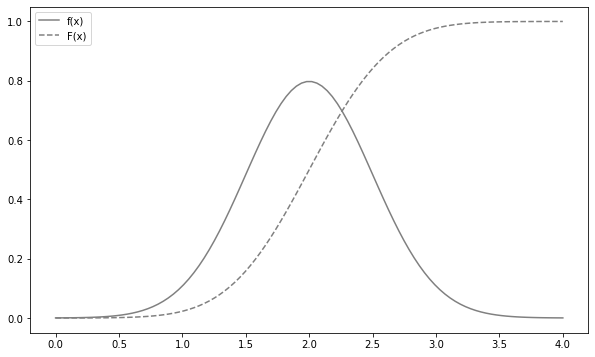

In [6]:
plot_prob(X, 0, 4)

In [7]:
rv = stats.norm(2, 0.5)

In [8]:
rv.mean(), rv.var()

(2.0, 0.25)

In [9]:
rv.pdf(2)

0.7978845608028654

In [10]:
rv.cdf(1.7)

0.27425311775007355

In [11]:
rv.isf(0.3)

2.2622002563540207

In [12]:
rv.interval(0.7978845608028654)

(1.3622261317913922, 2.637773868208608)

In [13]:
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [14]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

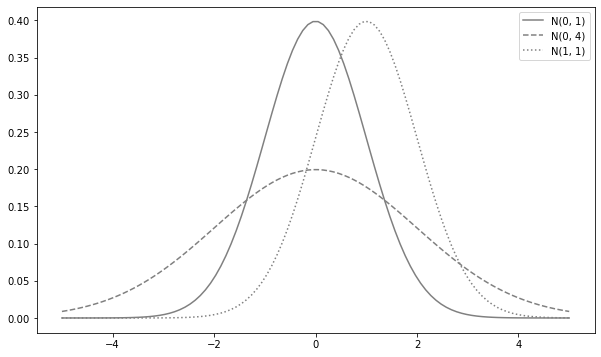

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

# 지수분포

In [16]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x>=0:
            return lam * np.exp(-lam*x)
        else:
            return 0
    return x_range, f

In [17]:
lam = 3
X = Ex(lam)

In [18]:
check_prob(X)

expected vaue 0.333
variance 0.111


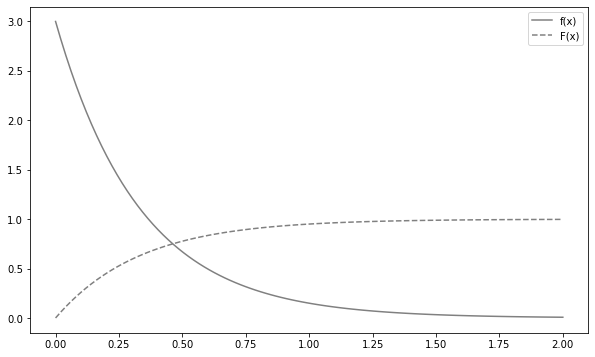

In [19]:
plot_prob(X, 0, 2)

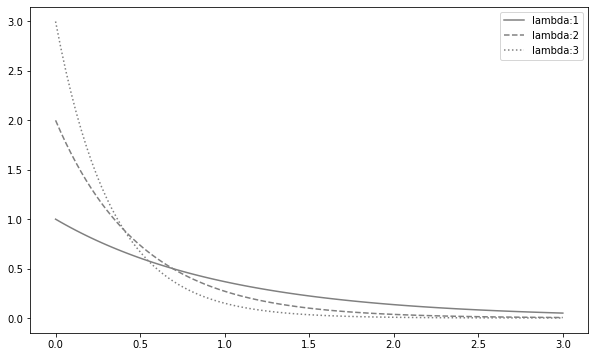

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

# 카이제곱분포

In [21]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
Zs_sample = rv.rvs((n, sample_size))
chi2_sample = np.sum(Zs_sample**2, axis=0)

In [22]:
Zs_sample

array([[-0.618, -0.545, -1.542, ..., -1.236,  0.993, -0.281],
       [ 0.482,  0.169,  1.71 , ...,  0.983, -0.823,  0.659],
       [ 1.26 , -1.167,  0.443, ..., -0.125, -1.566,  0.923],
       ...,
       [ 0.88 , -1.017,  0.978, ...,  0.49 , -0.354,  1.384],
       [-1.143, -1.451,  1.244, ...,  2.332, -1.286, -1.615],
       [-1.434,  0.801,  1.315, ..., -1.57 , -0.264,  0.027]])

In [25]:
chi2_sample

array([ 6.786,  7.739, 11.793, ..., 13.306,  7.965,  7.381])

In [26]:
len(chi2_sample)

1000000

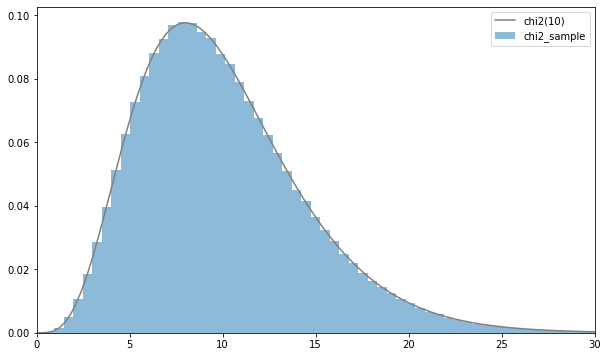

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

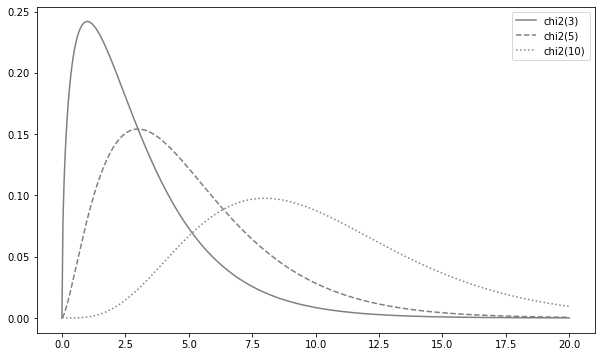

In [28]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

In [29]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

# t분포

In [30]:
n=10
rv1=stats.norm()
rv2=stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

In [31]:
t_sample

array([ 0.115, -0.229, -0.329, ...,  1.178,  0.387, -1.511])

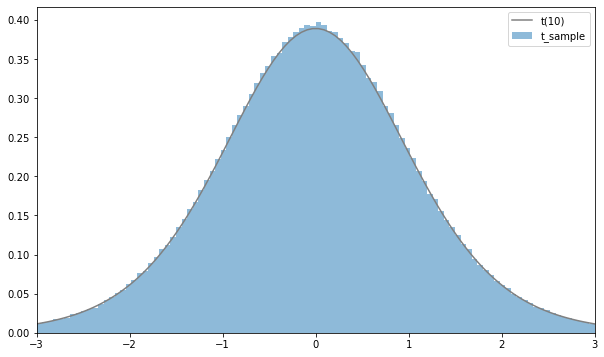

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

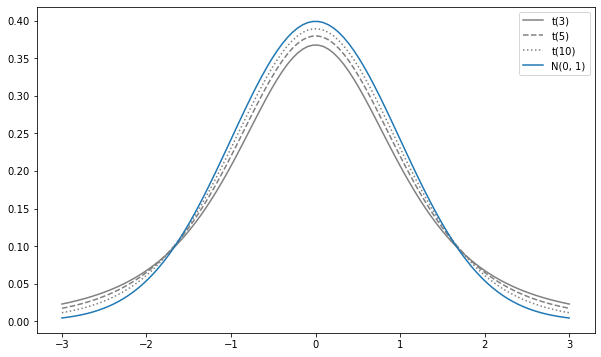

In [33]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

In [34]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

# F분포

In [36]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

In [37]:
f_sample

array([0.6  , 1.673, 0.452, ..., 0.498, 1.324, 0.714])

In [38]:
len(f_sample)

1000000

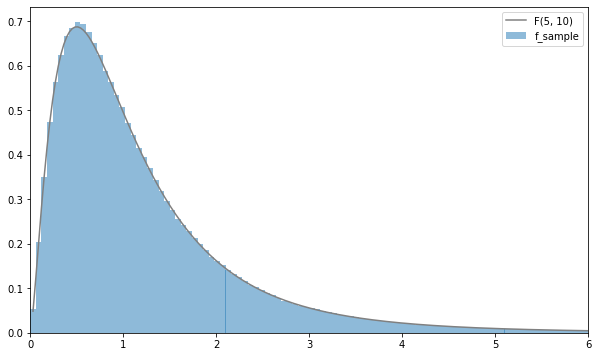

In [39]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

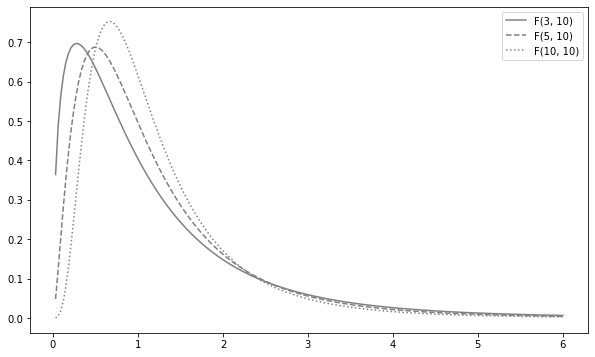

In [40]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()